# EDA

In [1]:
from utils.EDA.analysis import *
from utils.EDA.visualize import *

In [2]:
%matplotlib inline

In [3]:
plt.style.use("ggplot")

In [4]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [5]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
#df_train_info = df_train.info() # int : 35, float : 3, categorical : 43

In [7]:
df_train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analysis the SalePrices

In [8]:
df_train_target_info = df_train["SalePrice"].describe()
df_train_target_info["skew"] = df_train["SalePrice"].skew()
df_train_target_info["kurto"] = df_train["SalePrice"].kurt()
df_train_target_info
# 평균 판매가격은 18만 달러, median : 16만 달러

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
skew          1.882876
kurto         6.536282
Name: SalePrice, dtype: float64

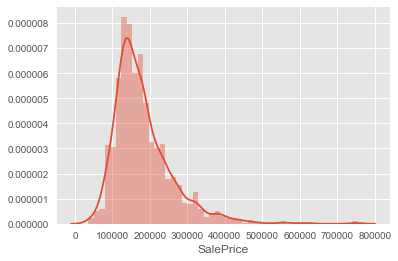

In [9]:
sns.distplot(df_train["SalePrice"], kde = True)

### missing values

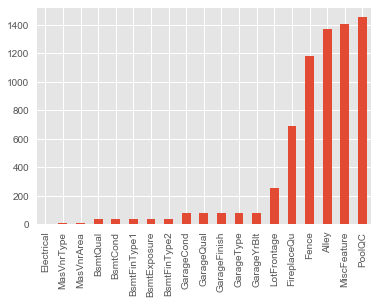

In [10]:
df_train_missing = df_train.isnull().sum()
df_train_missing = df_train_missing[df_train_missing > 0]
df_train_missing.sort_values(inplace = True)
df_train_missing.plot(kind = "bar")

In [11]:
df_train_missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

### split quantative, qualitative data

In [12]:
list_quanToqual = ["MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold", "YrSold"]

df_train_quan = extractQuanFromDF(df_train, 'Id', 'SalePrice', list_quanToqual)
df_train_qual = extractQualFromDF(df_train, include_list = list_quanToqual)

### univariate-quantative value

#### non-graphical

In [13]:
df_train_quan.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1515.463699,1978.506164,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,525.480383,24.689725,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,334.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1129.500000,1961.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,1464.000000,1980.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,1776.750000,2002.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,5642.000000,2010.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


#### graphical

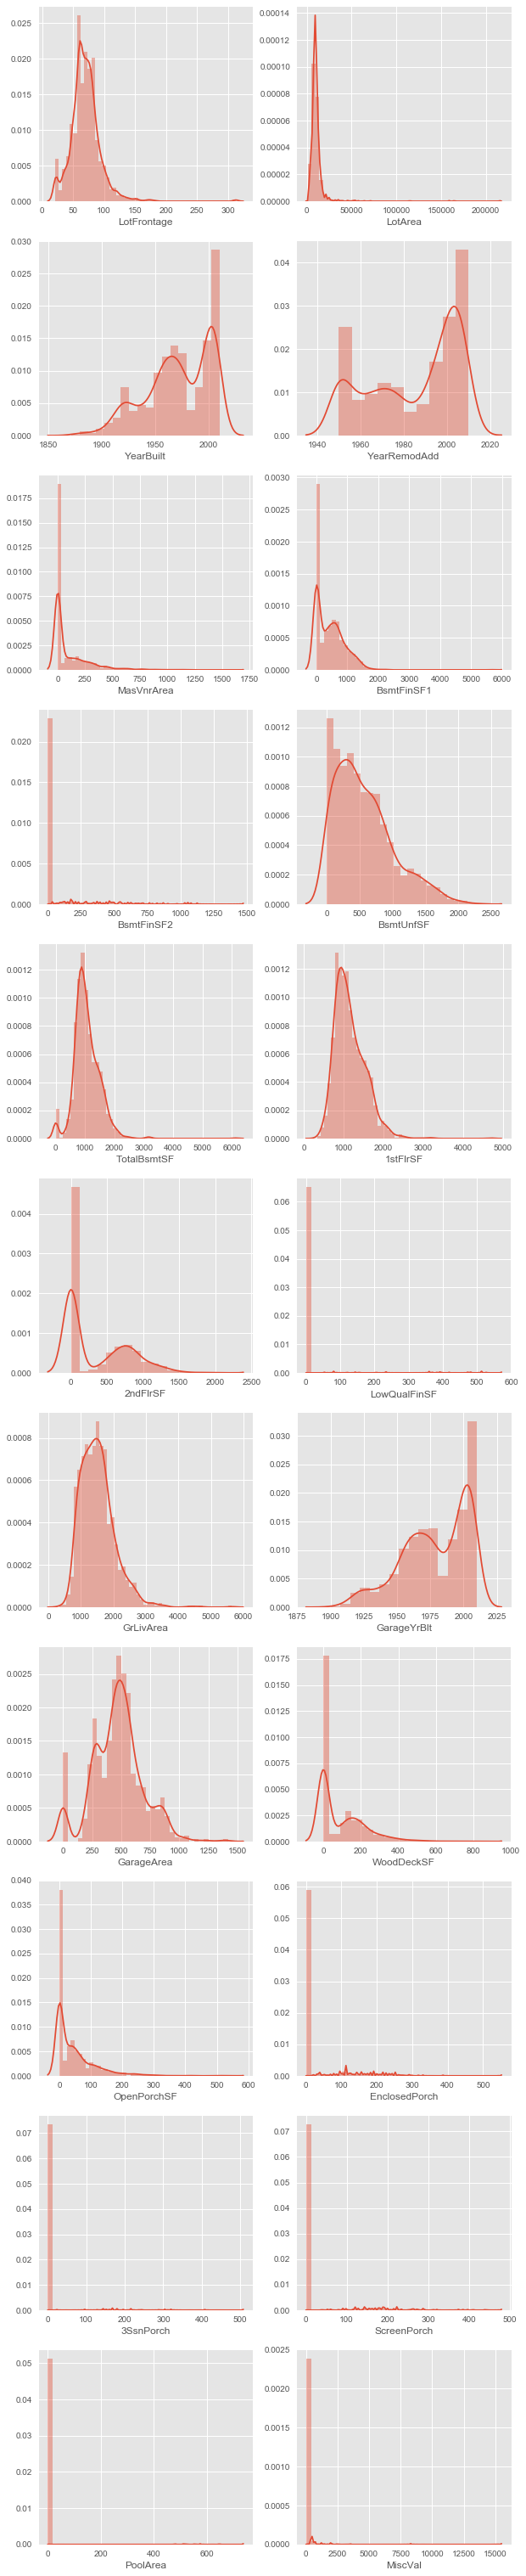

In [14]:
dispUniQuan(df_train_quan)

### univariate-qualitative value

#### graphical

In [15]:
get_ratio_categorical(df_train_qual, "TotRmsAbvGrd")

,count,ratio
6,402,27.534247
7,329,22.534247
5,275,18.835616
8,187,12.808219
4,97,6.643836
9,75,5.136986
10,47,3.219178
11,18,1.232877
3,17,1.164384
12,11,0.753425


In [26]:
# 각 카테고리의 가장 많이 찾이 하는 값과 비율 구하기
get_max_ratio_categorical(df_train_qual).tail()

,name,max_value,prop,total_num
54,GarageCars,2,56.438356,1460
55,MoSold,6,17.328767,1460
56,YrSold,2009,23.150685,1460
57,SalePrice,140000,1.369863,1460
58,count,1,100.000000,1460


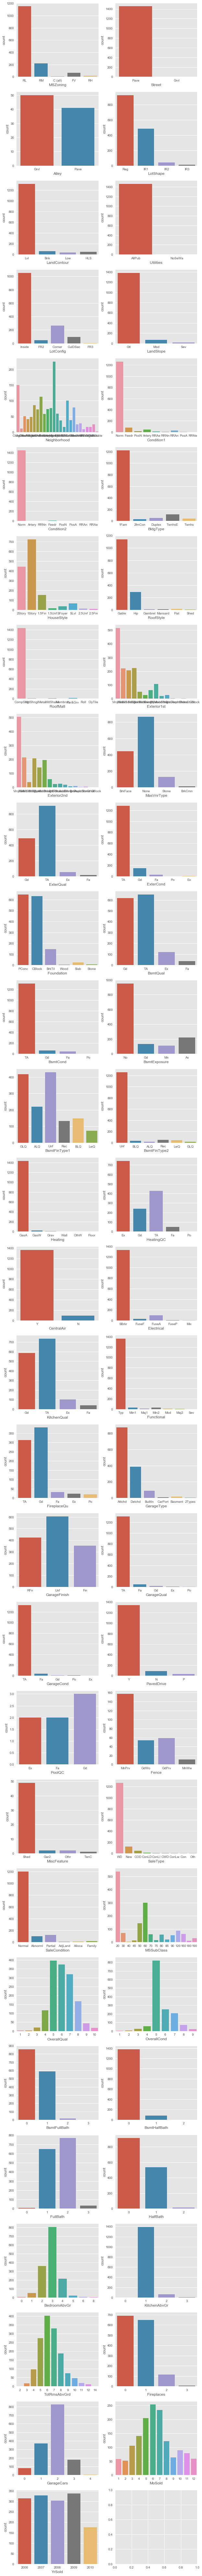

In [17]:
dispUniQual(df_train_qual)

### multivariate-quantative value (relative to SalePrice)

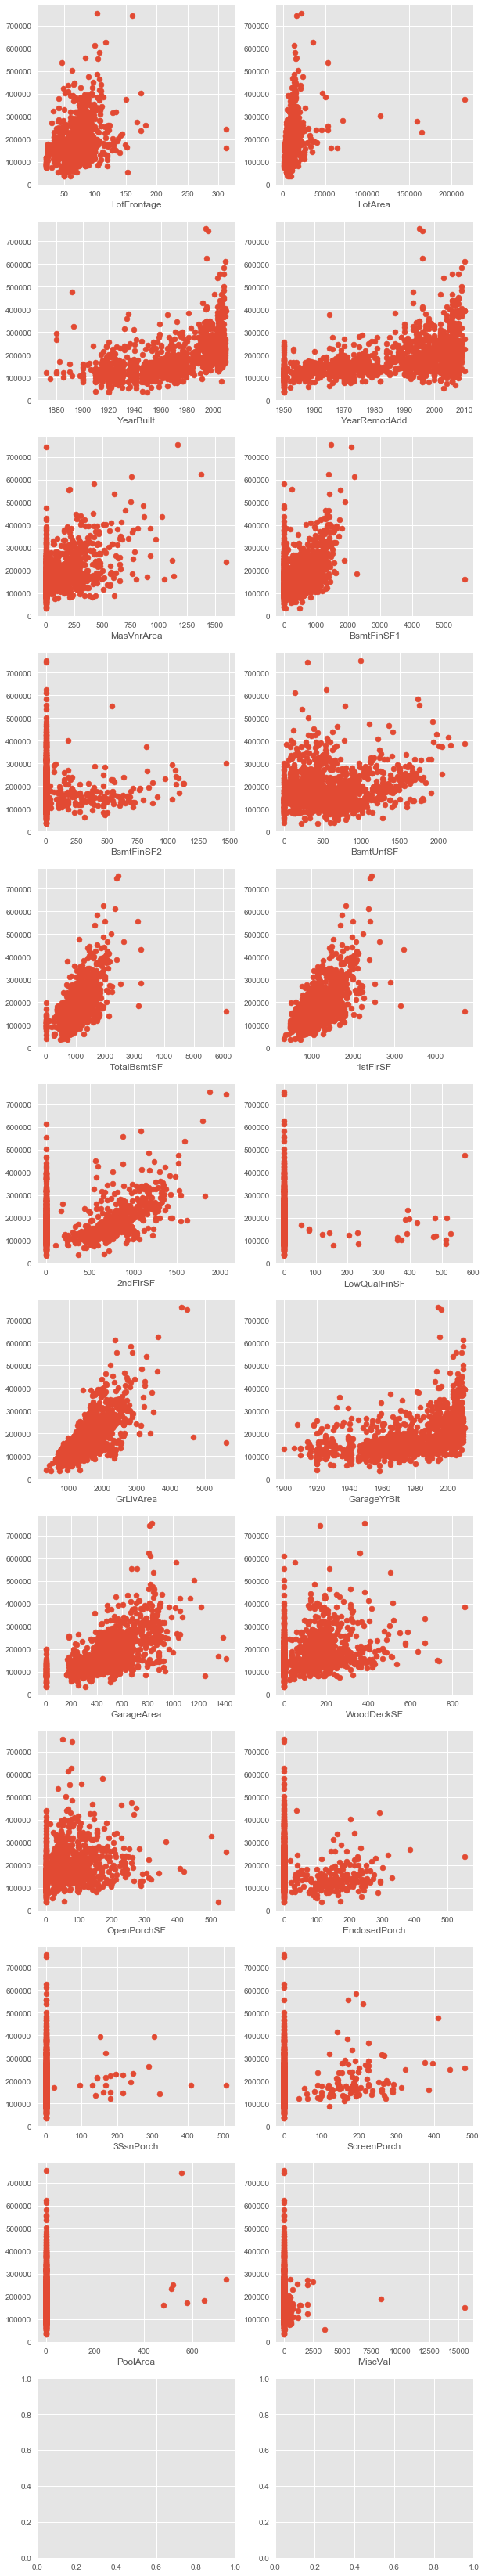

In [18]:
dispMultiQuan_target(df_train_quan, df_train["SalePrice"])

### multivariate-qualitative value(relative to SalePrice)

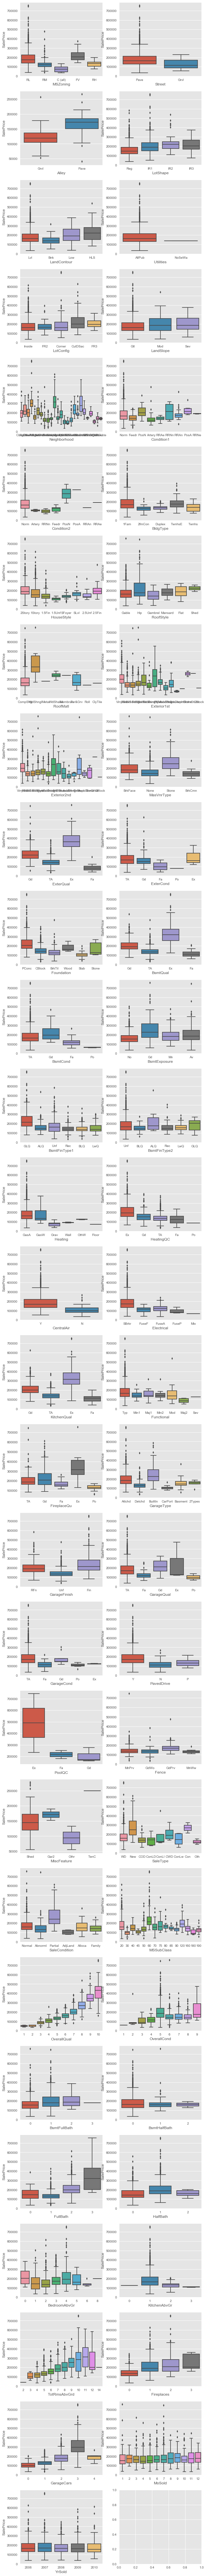

In [19]:
dispMultiQual_target(df_train_qual, df_train["SalePrice"])

### corellation between quantitative data

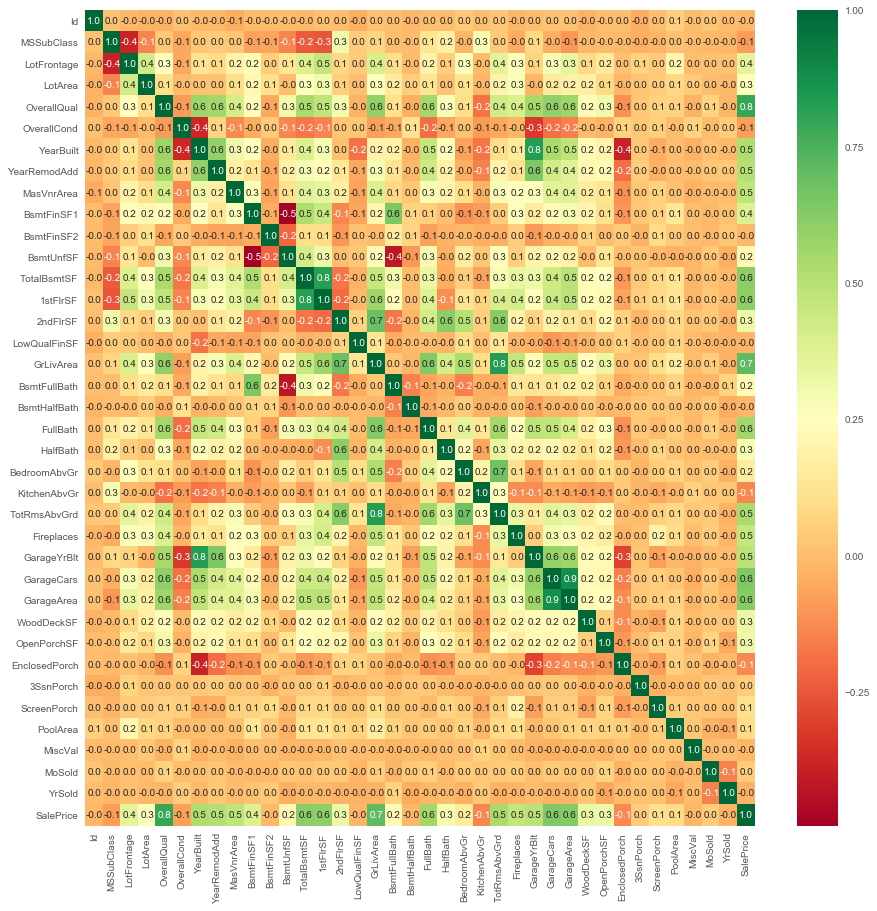

In [20]:
f, ax = plt.subplots(figsize = (15, 15))
data_cor = df_train.corr()
ax = sns.heatmap(data_cor, cmap = "RdYlGn", annot = True, fmt = "1.1f")

#### 상관성 깊은 요소 뽑아 내기

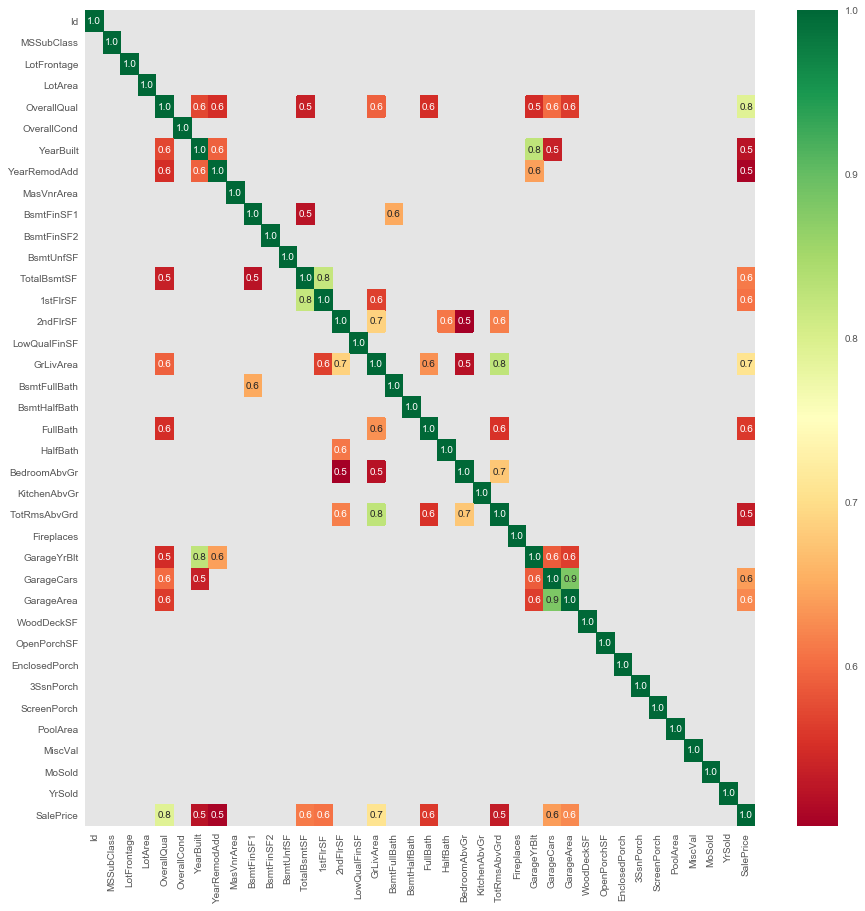

In [21]:
f, ax = plt.subplots(figsize = (15, 15))
ax = sns.heatmap(data_cor[data_cor > 0.5], cmap = "RdYlGn", annot = True, fmt = "1.1f")

#### 높은 correlation 값 가져오기

In [22]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = data_cor.columns

    for i in range(data_cor.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    
    return pairs_to_drop

def get_top_abs_cor(df, n=5, column = None):
    if(column == None):
        au_cor = df.corr().abs().unstack()
        labels_to_drop = get_redundant_pairs(df)
        au_cor = au_cor.drop(labels = labels_to_drop).sort_values(ascending =False)
    else:
        au_cor = df.corr().abs()[column].drop(column).sort_values(ascending = False)
        
    return au_cor[0:n]

#### SalePrice와 연관이 깊은 목록

In [23]:
get_top_abs_cor(df_train, 5, "SalePrice")

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

#### 전체 요소중 연관이 깊은 목록

In [24]:
get_top_abs_cor(df_train, 15)

GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
GrLivArea     FullBath        0.630012
GarageArea    SalePrice       0.623431
2ndFlrSF      TotRmsAbvGrd    0.616423
TotalBsmtSF   SalePrice       0.613581
dtype: float64

### Missing value treatment

#### Electonrical

In [25]:
df_train[df_train["Electrical"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


#### Veneer

#### Basement